In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt




In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.reshape(train_images.shape[0],28*28)
test_images = test_images.reshape(test_images.shape[0],28*28)

In [9]:
# It seems random forest is much faster than MLP and more accurate
model = RandomForestClassifier(n_estimators=128, criterion='entropy', max_depth=20, n_jobs=-1, oob_score=True) 
# model = MLPClassifier(max_iter=700) # 0.8557, 190 seconds
model.fit(train_images, train_labels.ravel())

# Predict
y_pred = model.predict(test_images)

# Print result
print(accuracy_score(test_labels, y_pred))

0.8766


0.8766
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.88      0.91      0.89      1000
           4       0.76      0.82      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.73      0.59      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



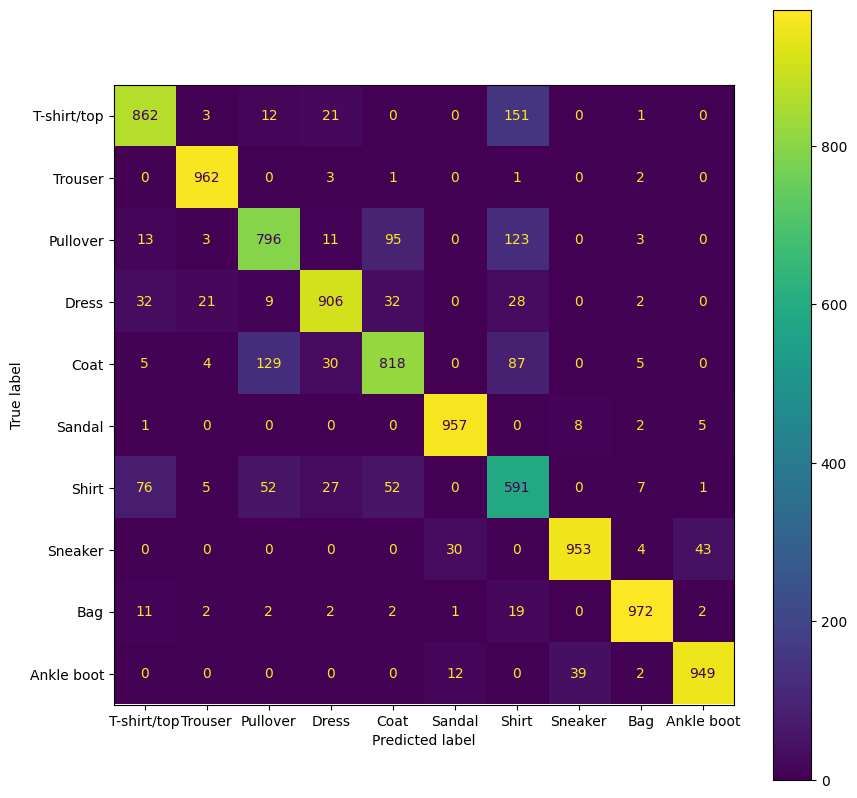

In [10]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(test_labels, y_pred))
print(classification_report(test_labels, y_pred))

label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
cm=confusion_matrix(y_pred,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

In [17]:
oob_error = 1 - model.oob_score_
oob_error

0.1176166666666667